In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [75]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [76]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [77]:
# check shape of the dataset
print(train.shape)
print(test.shape)

(1168, 81)
(292, 80)


* Train data have 1168 rows and 81 features.
* test data have 292 rows and 80 features.

In [78]:
# check information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

From the above info we can see that, null value present in data and need to fill.

In [79]:
# check discriptive analysis of numerical columns.
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


1. From the above table we can see that, there is large difference between mean of the data and standard deviation of the data of many columns. it depicts skewness is present in data and need to remove.
2. We can also see that, there is large difference between 75% of the data and maximum data. It depicts outliers present in data and need to remove.
3. Here, some variables are categorical. So, in cleaning process we will chage datatype of some variables.
4. properties minimum price is 34900 doller and maximum price is 755000 doller.

## Data cleaning

In [80]:
# check the number of null values present in dataset.
pd.set_option('Display.max_rows', None)
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [81]:
# Here we drop id column because it is not useful for our model
# we also drop MiscFeature column because it contains extra categories of home and have almost 96% null values.
train.drop("Id",axis=1,inplace=True)
train.drop("MiscFeature",axis=1,inplace=True)

test.drop("Id",axis=1,inplace=True)
test.drop("MiscFeature",axis=1,inplace=True)

In [82]:
# instead of drop null values which will result in data loss, we will fill null values according to provided data description.
# Fill null values of train data

train["LotFrontage"].fillna(0,inplace=True)
train["MasVnrArea"].fillna(0,inplace=True)

train["MasVnrType"].fillna("None",inplace=True)

#NA in Alley column means No Alley, so we will replace NA by no alley.
train["Alley"].fillna("No Alley",inplace=True)

#NA in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 column means No basement, so we will replace NA by no basement.
train["BsmtQual"].fillna("No basement",inplace=True)
train["BsmtCond"].fillna("No basement",inplace=True)
train["BsmtExposure"].fillna("No basement",inplace=True)
train["BsmtFinType1"].fillna("No basement",inplace=True)
train["BsmtFinType2"].fillna("No basement",inplace=True)

#NA in FireplaceQu column means No Fireplace, so we will replace NA by no Fireplace.
train["FireplaceQu"].fillna("No Fireplace",inplace=True)

#NA in GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond columns mean No Garage, so we will replace NA by no garage.
train["GarageType"].fillna("No Garage",inplace=True)
train["GarageFinish"].fillna("No Garage",inplace=True)
train["GarageQual"].fillna("No Garage",inplace=True)
train["GarageCond"].fillna("No Garage",inplace=True)
train['GarageYrBlt'].fillna("No Garage",inplace=True)

#NA in PoolQC column means No Pool, so we will replace NA by no pool.
train["PoolQC"].fillna("No Pool",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by no fence.
train["Fence"].fillna("No Fence",inplace=True)


In [83]:
# fill null values for test data

test["LotFrontage"].fillna(0,inplace=True)
test["MasVnrArea"].fillna(0,inplace=True)

test["MasVnrType"].fillna("None",inplace=True)

#NA in Alley column means No Alley, so we will replace NA by no alley.
test["Alley"].fillna("No Alley",inplace=True)

#NA in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 column means No basement, so we will replace NA by no basement.
test["BsmtQual"].fillna("No basement",inplace=True)
test["BsmtCond"].fillna("No basement",inplace=True)
test["BsmtExposure"].fillna("No basement",inplace=True)
test["BsmtFinType1"].fillna("No basement",inplace=True)
test["BsmtFinType2"].fillna("No basement",inplace=True)

#NA in FireplaceQu column means No Fireplace, so we will replace NA by no Fireplace.
test["FireplaceQu"].fillna("No Fireplace",inplace=True)

#NA in GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond columns mean No Garage, so we will replace NA by no garage.
test["GarageType"].fillna("No Garage",inplace=True)
test["GarageFinish"].fillna("No Garage",inplace=True)
test["GarageQual"].fillna("No Garage",inplace=True)
test["GarageCond"].fillna("No Garage",inplace=True)
test['GarageYrBlt'].fillna("No Garage",inplace=True)

#NA in PoolQC column means No Pool, so we will replace NA by no pool.
test["PoolQC"].fillna("No Pool",inplace=True)

#NA in Fence column means No Fence, so we will replace NA by no fence.
test["Fence"].fillna("No Fence",inplace=True)


In [84]:
# converting datatype of some variables into object to treat them as a categorical variables in train dataset.
train["MSSubClass"] = train["MSSubClass"].astype('object')
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')
train['BsmtFullBath'] = train['BsmtFullBath'].astype('object')
train['BsmtHalfBath'] = train['BsmtHalfBath'].astype('object')
train['FullBath'] = train['FullBath'].astype('object')
train['HalfBath'] = train['HalfBath'].astype('object')
train['Fireplaces'] = train['Fireplaces'].astype('object')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('object')

In [85]:
# converting datatype of some variables into object to treat them as a categorical variables in train dataset.
test["MSSubClass"] = test["MSSubClass"].astype('object')
test['OverallQual'] = test['OverallQual'].astype('object')
test['OverallCond'] = test['OverallCond'].astype('object')
test['BsmtFullBath'] = test['BsmtFullBath'].astype('object')
test['BsmtHalfBath'] = test['BsmtHalfBath'].astype('object')
test['FullBath'] = test['FullBath'].astype('object')
test['HalfBath'] = test['HalfBath'].astype('object')
test['Fireplaces'] = test['Fireplaces'].astype('object')
test['GarageYrBlt'] = test['GarageYrBlt'].astype('object')

# Data Analysis

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

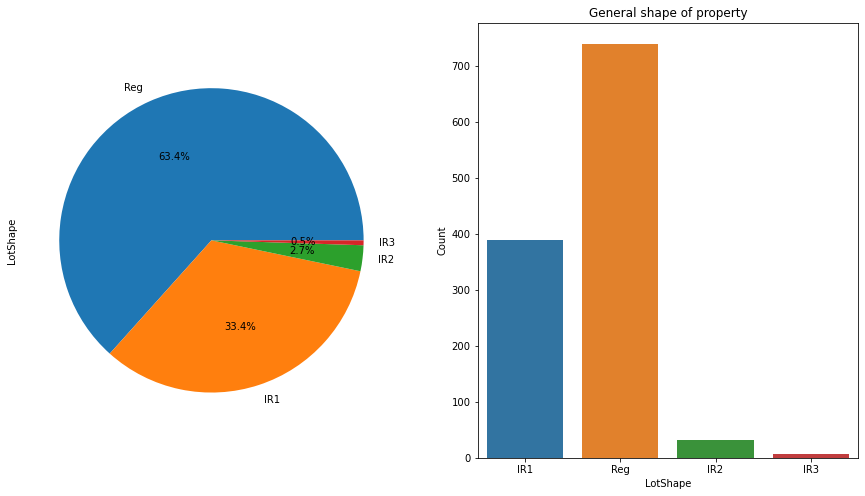

In [86]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
train['LotShape'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='LotShape',data=train)
plt.title("General shape of property")
plt.ylabel('Count')
train['LotShape'].value_counts()

Out of 1168 properties, Approximately 750 properties are in regular shape, while around 400 properties are slightly irregular.(Reg=Regular,IR1=Slightly irregular,IR2=Moderately Irregular,IR3=Irregular)

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

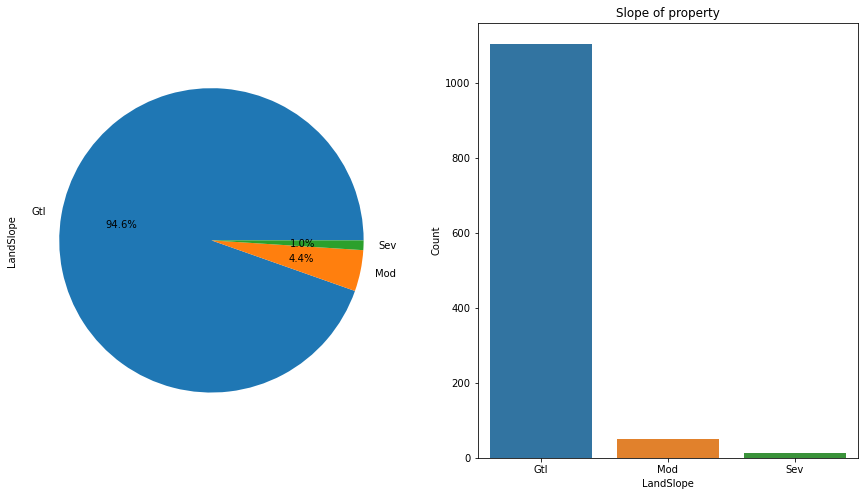

In [87]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
train['LandSlope'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='LandSlope',data=train)
plt.title("Slope of property")
plt.ylabel('Count')
train['LandSlope'].value_counts()

From the above plot we can see that, most of the properties land slope is gentle.(Gtl=Gentle slope,Mod=Moderate Slope,Sev=Severe Slope)

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

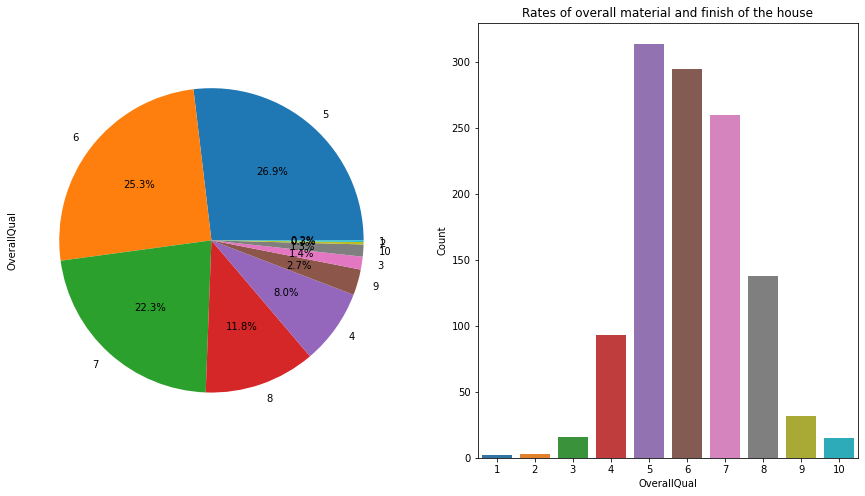

In [88]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
train['OverallQual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='OverallQual',data=train)
plt.title("Rates of overall material and finish of the house")
plt.ylabel('Count')
train['OverallQual'].value_counts()

From the above plot we can see that, out of 1168 houses 314 houses overall quality is average and 295 houses overall quality is above average.(10=Very Excellent,9=Excellent,8=Very Good,7=Good,6=Above Average,5=Average,4=Below Average,3=Fair,2=Poor,1=Very Poor)

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

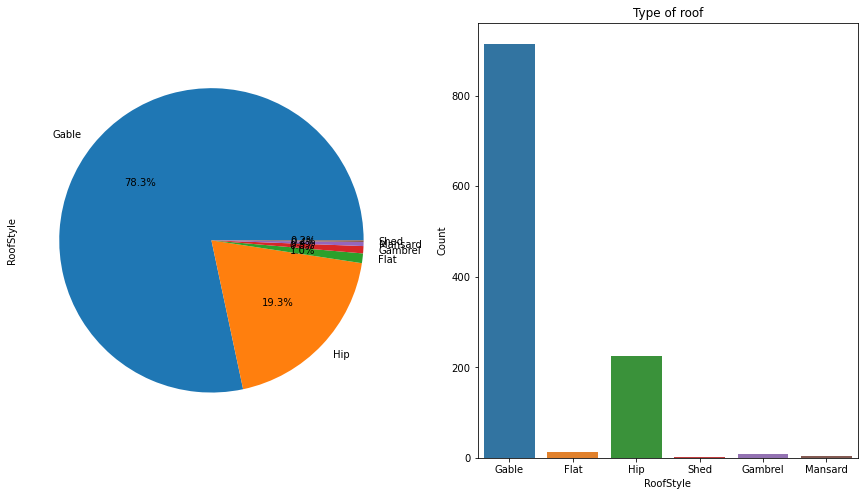

In [89]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
train['RoofStyle'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='RoofStyle',data=train)
plt.title("Type of roof")
plt.ylabel('Count')
train['RoofStyle'].value_counts()

Out of 1168 houses, 915 houses roof style is Gable and only 2 houses roof style is shed.

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64

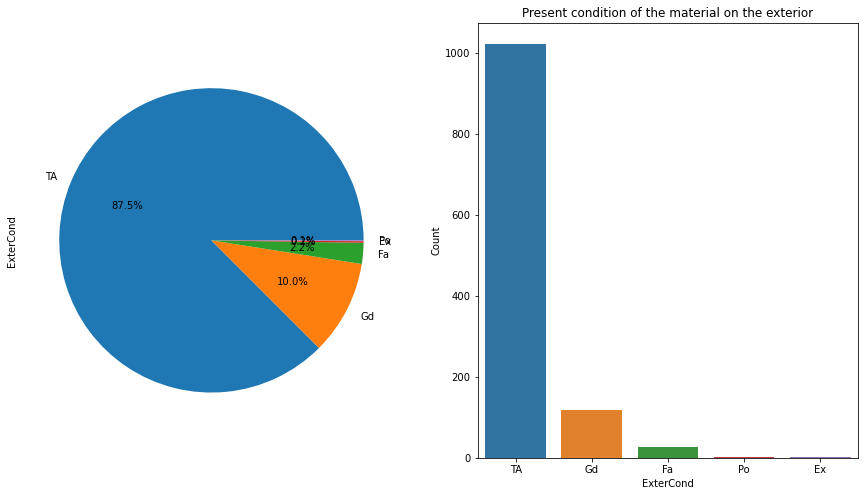

In [90]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
train['ExterCond'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='ExterCond',data=train)
plt.title("Present condition of the material on the exterior")
plt.ylabel('Count')
train['ExterCond'].value_counts()

From the above plot we can see that, almost 1000 properties Present condition of the material on the exterior is average. (Ex=Excellent,Gd=Good,TA=Average/Typical,Fa=Fair,Po=Poor)

TA             1041
Gd               56
Fa               39
No basement      30
Po                2
Name: BsmtCond, dtype: int64

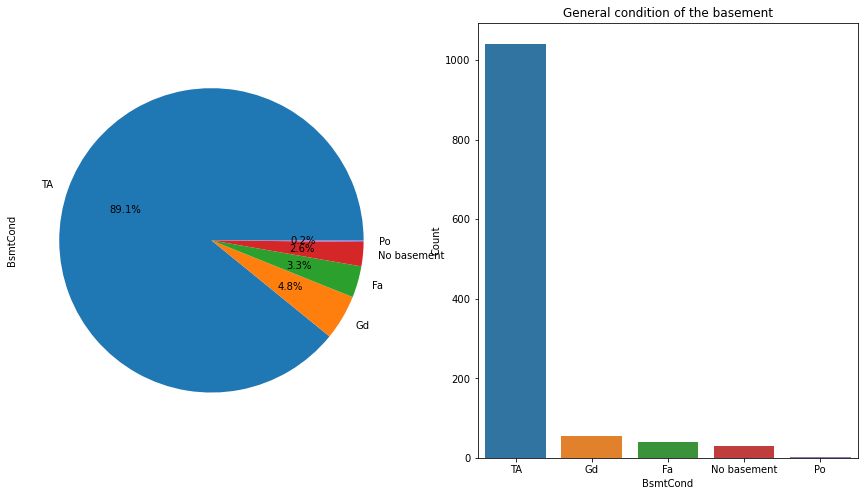

In [91]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
train['BsmtCond'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='BsmtCond',data=train)
plt.title("General condition of the basement")
plt.ylabel('Count')
train['BsmtCond'].value_counts()

Out of 1168 houses, 1041 houses basement condition is typical, while 30 hoses are without basement.(Gd=Good,TA=Typical - slight dampness allowed,Fa=Fair - dampness or some cracking or settling,Po=Poor - Severe cracking, settling, or wetness)

Y    1090
N      78
Name: CentralAir, dtype: int64

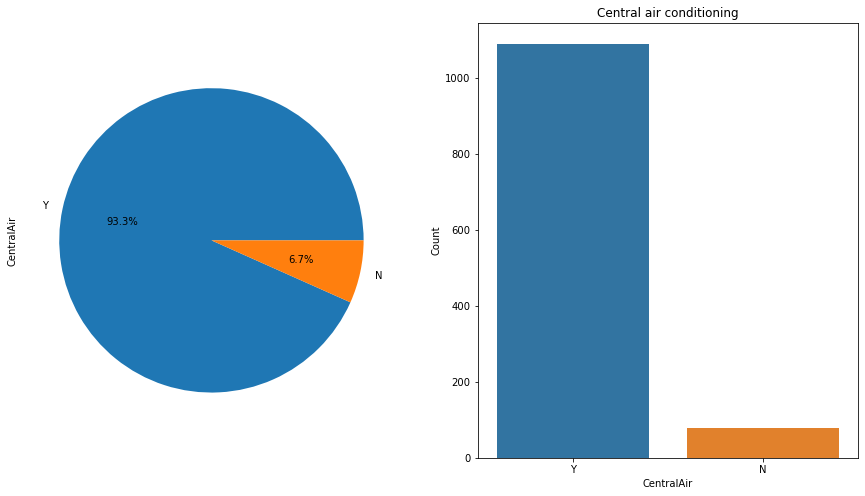

In [92]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
train['CentralAir'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='CentralAir',data=train)
plt.title("Central air conditioning")
plt.ylabel('Count')
train['CentralAir'].value_counts()

From the above count plot we can see that, most of the properties have central air conditioning system.(Y=yes,N=no)

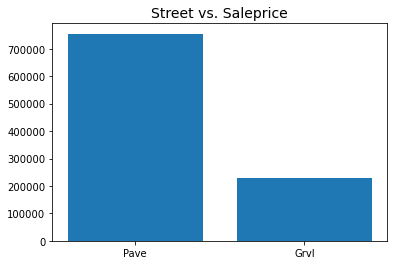

In [93]:
plt.bar(train["Street"],train["SalePrice"])
plt.title("Street vs. Saleprice", fontsize=14)
plt.show()

Properties price is very high where street is paved, while price is low where street is gravel.

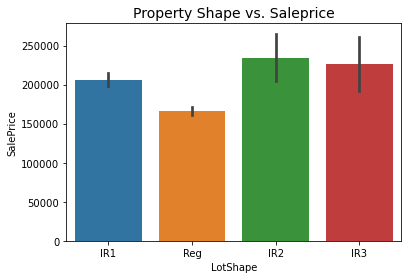

In [94]:
sns.barplot(x="LotShape",y="SalePrice",data=train)
plt.title("Property Shape vs. Saleprice", fontsize=14)
plt.show()

From the above bar plot we can see that, properties price is high where shape of the properties is moderately irregular, while price is low where shape of the properties regular compares to other categories.(Reg=Regular,IR1=Slightly irregular,IR2=Moderately Irregular,IR3=Irregular)

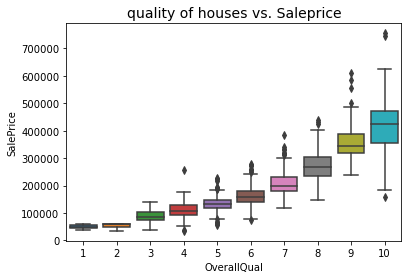

In [95]:
sns.boxplot(x="OverallQual",y="SalePrice",data=train)
plt.title("quality of houses vs. Saleprice", fontsize=14)
plt.show()

From the above box plot we can see that, price of the houses is very high where overall quality of the houses is very excellent and price decrease from going 10 to 1. (10=Very Excellent,9=Excellent,8=Very Good,7=Good,6=Above Average,5=Average,4=Below Average,3=Fair,2=Poor,1=Very Poor)

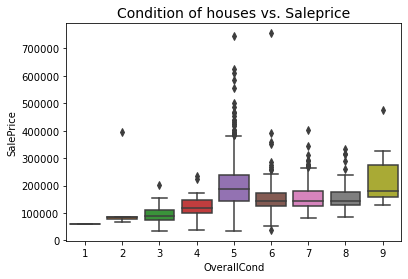

In [96]:
sns.boxplot(x="OverallCond",y="SalePrice",data=train)
plt.title("Condition of houses vs. Saleprice", fontsize=14)
plt.show()

1. From the above box plot we can see that, houses price is high where overall condition of the houses is excellent, while price of the houses is almost same where condition of the houses is above average,good and very good.
2. Average condition houses price is higher than above average, good and very good condition houses.
3. (9=Excellent,8=Very Good,7=Good,6=Above Average,5=Average,4=Below Average,3=Fair,2=Poor,1=Very Poor)

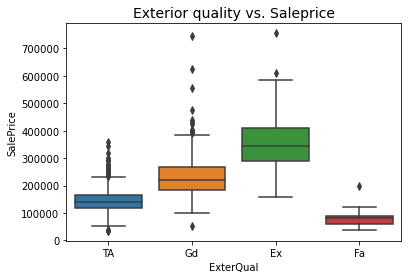

In [97]:
sns.boxplot(x="ExterQual",y="SalePrice",data=train)
plt.title("Exterior quality vs. Saleprice", fontsize=14)
plt.show()

Properties price is high where quality of the material on the exterior is excellent, while price is low where quality of the material on the exterior is fair.(Ex=Excellent,Gd=Good,TA=Average/Typical,Fa=Fair,Po=Poor)

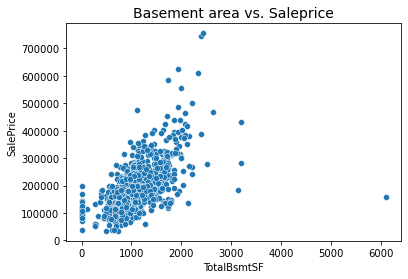

In [98]:
sns.scatterplot(x="TotalBsmtSF",y="SalePrice",data=train)
plt.title("Basement area vs. Saleprice", fontsize=14)
plt.show()

From the above scatterplot we can see that, total square feet of basement area and saleprice are positively correlated to each other.

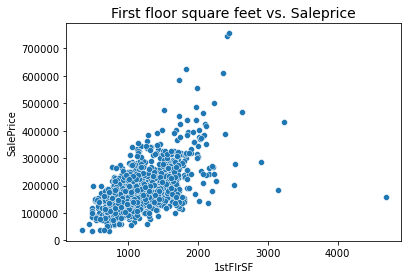

In [99]:
sns.scatterplot(x="1stFlrSF",y="SalePrice",data=train)
plt.title("First floor square feet vs. Saleprice", fontsize=14)
plt.show()

From the above scatterplot we can see that, First floor square feet and houses price are positively correlated to each other.

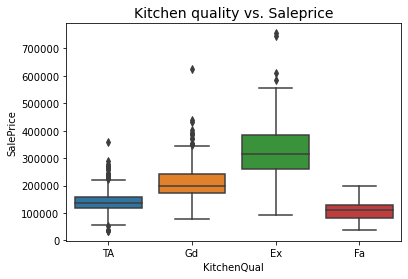

In [100]:
sns.boxplot(x="KitchenQual",y="SalePrice",data=train)
plt.title("Kitchen quality vs. Saleprice", fontsize=14)
plt.show()

From the above box plot we can see that, houses price is higher where kitchen quality is excellent and price is lower where kitchen quality is fair compare to other categories.(Ex=Excellent,Gd=Good,TA=Typical/Average,Fa=Fair)

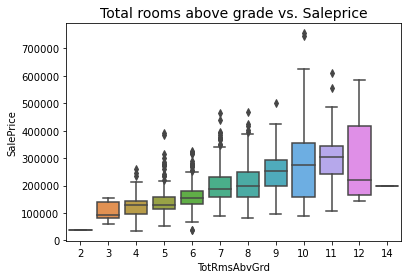

In [101]:
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=train)
plt.title("Total rooms above grade vs. Saleprice", fontsize=14)
plt.show()

From the above plot we can see that, properties price is higher where total rooms above grade is 12 but price is lower where total rooms above grade is 14

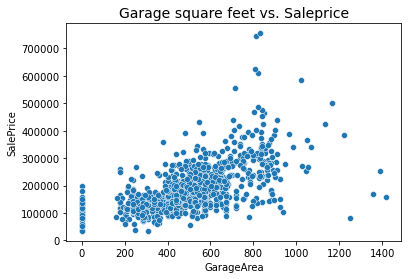

In [102]:
sns.scatterplot(x="GarageArea",y="SalePrice",data=train)
plt.title("Garage square feet vs. Saleprice", fontsize=14)
plt.show()

Square feet area of garage and properties price is positively correlated to each other.

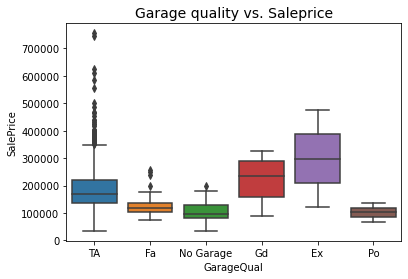

In [103]:
sns.boxplot(x="GarageQual",y="SalePrice",data=train)
plt.title("Garage quality vs. Saleprice", fontsize=14)
plt.show()

Where garage quality is excellent, properties price is around 400000 dollar and price is around 100000 dollar where garage quality is poor.(Ex=Excellent,Gd=Good,TA=Typical/Average,Fa=Fair,Po=Poor,NA=No Garage)

# Pre-processing 

In [104]:
#split numerical and categorical columns of train dataset
numerical_col = train.select_dtypes(include=['float64','int64'])
cat_col = train.select_dtypes(include=['object'])

In [105]:
#split numerical and categorical columns of test dataset
numerical_col_test = test.select_dtypes(include=['float64','int64'])
cat_col_test = test.select_dtypes(include=['object'])

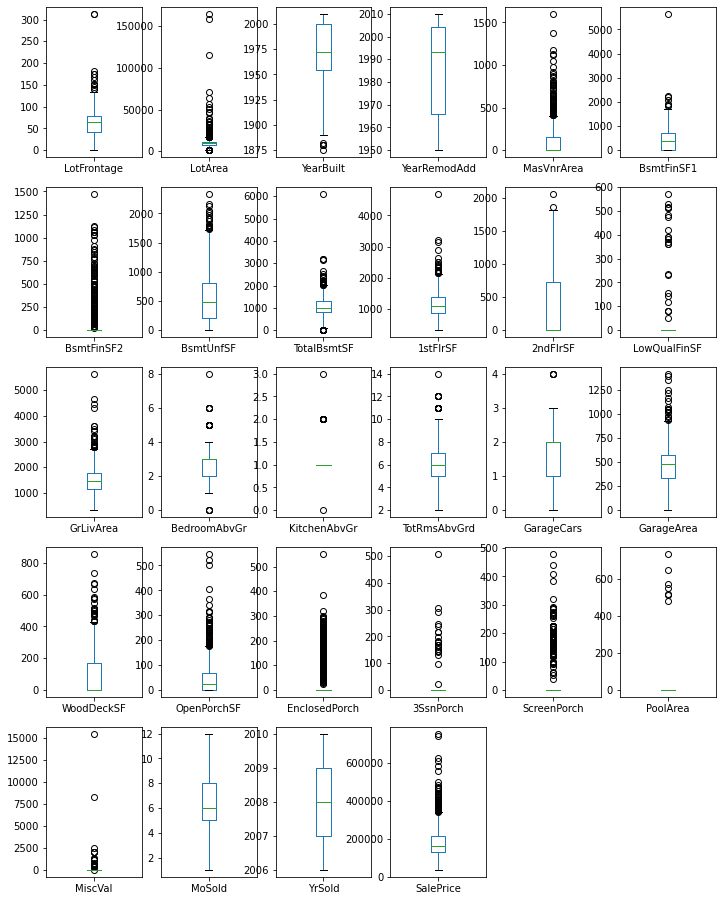

In [106]:
# check outliers through plotting boxplot.
numerical_col.plot.box(subplots=True,figsize=(12,16),layout=(5,6))
plt.show()

From the above boxplot we can see that, almost every features have outliers and need to remove.

## Handling Outliers

In [107]:
# Check outliers using zscore
from scipy.stats import zscore
z = np.abs(zscore(numerical_col))
threshold=3
print(np.where(z>3))

(array([   1,    1,    7,   14,   20,   22,   23,   25,   32,   32,   32,
         33,   38,   47,   51,   51,   63,   66,   66,   68,   68,   72,
         73,   74,   76,   77,   78,   91,   93,   93,   95,   96,   97,
         98,  103,  103,  103,  103,  103,  103,  106,  107,  112,  113,
        115,  119,  119,  119,  127,  133,  138,  138,  140,  141,  141,
        141,  141,  141,  141,  141,  142,  142,  143,  150,  151,  152,
        156,  157,  166,  170,  178,  178,  191,  192,  192,  192,  196,
        206,  210,  211,  212,  214,  216,  226,  228,  232,  232,  232,
        232,  237,  241,  241,  241,  241,  243,  245,  245,  253,  254,
        255,  269,  272,  273,  284,  284,  289,  299,  299,  300,  304,
        305,  305,  305,  305,  305,  305,  308,  309,  310,  310,  312,
        319,  320,  325,  333,  335,  338,  338,  352,  352,  355,  356,
        357,  361,  361,  361,  361,  361,  361,  361,  362,  363,  369,
        372,  378,  379,  380,  381,  387,  389,  

In [108]:
# removing outliers
train1 = numerical_col[(z<3).all(axis=1)]
train1.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.0,4928,1976,1976,0.0,120,0,958,1078,958,...,0,205,0,0,0,0,0,2,2007,128000
2,92.0,9920,1996,1997,0.0,862,0,255,1117,1127,...,180,130,0,0,0,0,0,6,2007,269790
3,105.0,11751,1977,1977,480.0,705,0,1139,1844,1844,...,0,122,0,0,0,0,0,1,2010,190000
4,0.0,16635,1977,2000,126.0,1246,0,356,1602,1602,...,240,0,0,0,0,0,0,6,2009,215000
5,58.0,14054,2006,2006,0.0,0,0,879,879,879,...,100,17,0,0,0,0,0,11,2006,219210


In [109]:
# check shape of the dataset, before and after removing outliers.
print(train.shape)
print(train1.shape)

(1168, 79)
(878, 28)


In [110]:
# check percentage loss of data after removing outliers.
percentage_loss = ((1168-878)/1168)*100
percentage_loss

24.82876712328767

Here, percentage loss of data is very high using zscore. so, we don't use zscore for remove outliers.

In [111]:
# check outliers using inter quartile range.
Q1=numerical_col.quantile(0.25)
Q3=numerical_col.quantile(0.75)
IQR=Q3-Q1
print(IQR)

LotFrontage         37.50
LotArea           3894.00
YearBuilt           46.00
YearRemodAdd        38.00
MasVnrArea         160.00
BsmtFinSF1         714.50
BsmtFinSF2           0.00
BsmtUnfSF          600.00
TotalBsmtSF        492.50
1stFlrSF           500.00
2ndFlrSF           729.00
LowQualFinSF         0.00
GrLivArea          651.75
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
GarageCars           1.00
GarageArea         238.00
WoodDeckSF         171.00
OpenPorchSF         70.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84625.00
dtype: float64


In [112]:
df_new1=numerical_col[~((numerical_col < (Q1 - 1.5 * IQR)) | (numerical_col > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new1.shape)

(548, 28)


Here, percentage loss of data is also high by using inter qurtile range. so, removing outliers is not a good idea because it losses more data and it affects our model badly.

In [113]:
# here, our target variable is saleprice, so we take it as a y variable. It is a regression type problem. 
x = train.drop(["SalePrice"],axis=1)
y = train["SalePrice"]

### Handling Skewness

In [114]:
x.skew()

MSSubClass        1.422019
LotFrontage       0.364916
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
dtype: float64

from the above observation we can see that, value above 4 depicts skewness, so check skewness of those features by using distribution plot and then decide remove skewness or not.

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

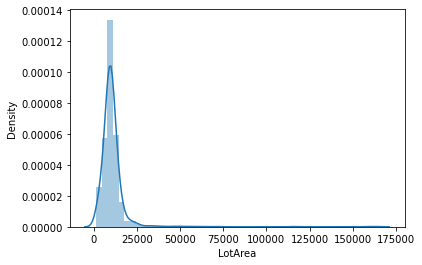

In [115]:
# check skewness of the some features.
sns.distplot(train["LotArea"])

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Density'>

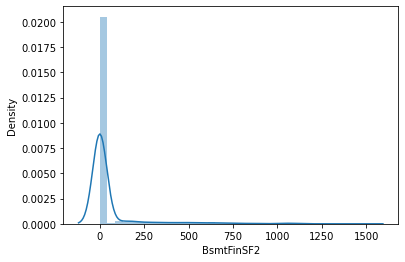

In [116]:
sns.distplot(train["BsmtFinSF2"])

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

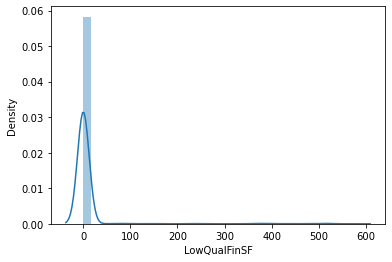

In [117]:
sns.distplot(train["LowQualFinSF"])

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

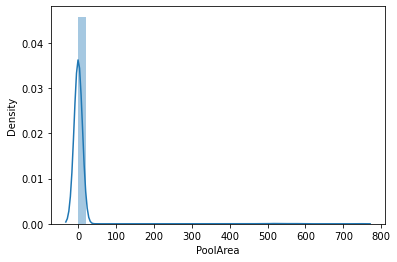

In [118]:
sns.distplot(train["PoolArea"])

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

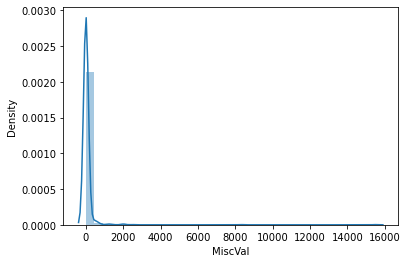

In [119]:
sns.distplot(train["MiscVal"])

From the above all plot we can see that, all plots mostly have right skewed and need to remove skewness. we use log method for remove skewness.

In [120]:
# here, we remove skewness of numerical features using log method.
x = x.select_dtypes(include=['float64','int64'])
x = np.log1p(x)

# remove skewness of test datasets numerical features.
z = test.select_dtypes(include=['float64','int64'])
z = np.log1p(z)

In [121]:
# merge numerical and categorical variables for train dataset
x_new = pd.concat([x,cat_col],axis=1)

# merge numerical and categorical variables data for test dataset.
test = pd.concat([z,cat_col_test],axis=1)

### Encoding Data

In [122]:
# merge train and test dataset for encoding.
df = pd.concat((x_new,test))

In [123]:
# Here, we convert categorical data into numerical data for model building and we use one hot encoding method.
x_encode = pd.get_dummies(df, drop_first=True)
x_encode.shape

(1460, 387)

### Scaling data

In [124]:
#scaling data with mean=0 and unit variance using standard scaler mothod
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_s = sc.fit_transform(x_encode)

In [125]:
# here, we split train dataset and test dataset for further process.
x = x_encode.head(1168) # we already split our target variable in above process as y 

test = x_encode.tail(292)

# Building Machine Learning Models 

In [134]:
# split train and test data from training dataset.
from sklearn.model_selection import train_test_split,cross_val_score

#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [135]:
#Choosing the best random state using Logistic regression
#def randomstate(a,b):
#    maxx=1000
#   for state in range(1,201):
#        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
#        model=LinearRegression()
#        model.fit(xtrain,ytrain)
#        p=model.predict(xtest)
#        mse=mean_squared_error(p,ytest)
#        if maxx>mse:
#            maxx=mse
#            j=state
#    return j

In [136]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),KNeighborsRegressor(),ExtraTreeRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor','KNeighborsRegressor','ExtraTreeRegressor']

In [142]:
#Creating methord for the models and appending them to data frame

def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=42)
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
        
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    
    data.set_index('Model',inplace = True)
    return data

In [143]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,36024.5226,3.759661e+09,61316.0744,0.12,0.5536
SVR,58389.2150,7.325959e+09,85591.8190,-26403029.69,-0.0614
LinearRegression,33051.4309,6.549556e+09,80929.3241,0.53,0.7458
Lasso,28222.8172,4.524207e+09,67262.2287,0.57,0.7212
Ridge,21722.4414,1.380664e+09,37157.2902,0.78,0.8188
ElasticNet,28250.9450,2.309741e+09,48059.7698,0.29,0.6977
DecisionTreeRegressor,27844.9692,1.910364e+09,43707.7077,0.72,0.6035
RandomForestRegressor,21054.9192,1.596241e+09,39952.9906,0.71,0.8229
AdaBoostRegressor,25213.6283,1.658926e+09,40729.9111,0.70,0.7419


## Hyperparameter Tuning

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

### Random Forest

In [146]:
params={'n_estimators':[100,300,500],
           'max_features':['int','float','log2']}

g=GridSearchCV(RandomForestRegressor(),params,cv=10)

g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['int', 'float', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [147]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'max_features': 'log2', 'n_estimators': 500}
RandomForestRegressor(max_features='log2', n_estimators=500)
0.8192475359607039


In [148]:
m=RandomForestRegressor(max_features='log2', n_estimators=500)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [149]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 21045.3437
Mean Squared Error is 1460528065.1504
Root Mean Squared Error is 38216.8558
R2 Score is 61.519999999999996
Mean of cross validaton Score is 81.5666


### Gradient Boost

In [150]:
from sklearn.model_selection import RandomizedSearchCV

In [151]:
params={'subsample':[0.5,1],
      'max_depth':[6,7,8,9,10,None]}

g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, None],
                                        'subsample': [0.5, 1]})

In [152]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'max_depth': 6}
GradientBoostingRegressor(max_depth=6, subsample=0.5)
0.8647130991612497


In [154]:
m=GradientBoostingRegressor(max_depth=6, subsample=0.5)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [155]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 18483.5758
Mean Squared Error is 1293581724.8751
Root Mean Squared Error is 35966.3972
R2 Score is 80.04
Mean of cross validaton Score is 83.8162


### Xtreme Gradient Boost

In [156]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...one,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          re

In [157]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
{'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.3}
0.8692596609235679


In [158]:
m=XGBRegressor(colsample_bytree=0.3,gamma=0.1,learning_rate=0.05,max_depth=8,min_child_weight=7)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [159]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 18521.4082
Mean Squared Error is 1292552774.1158
Root Mean Squared Error is 35952.09
R2 Score is 76.74
Mean of cross validaton Score is 84.5968


# Finalizing the Model

In [160]:
model=XGBRegressor(colsample_bytree=0.3,gamma=0.1,learning_rate=0.05,max_depth=8,min_child_weight=7)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

### Evaluation Metrics

In [161]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 18521.4082
Mean Squared Error is 1292552774.1158
Root Mean Squared Error is 35952.09
R2 Score is 76.74
Mean of cross validaton Score is 84.5968


Text(0.5, 1.0, 'XGBRegressor')

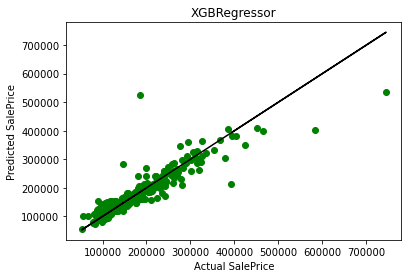

In [162]:
plt.scatter(x=ytest,y=p,color='g')
plt.plot(ytest,ytest,color='k')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('XGBRegressor')

# Saving the Model

In [163]:
import joblib
joblib.dump(model,'housing.obj')

['housing.obj']